In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import date
from dateutil.parser import parse
import numpy as np
from sklearn import preprocessing
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import graphviz
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/080119_pk and carmudi_cebuonly.csv')

In [3]:
df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Version,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age
0,CAR014565,1+B7:U20079989 Toyota Crown 3.0 MT,195000,Toyota,Crown,1989,Yes,Manual,White,1.0,...,3,The 1989 Toyota Crown with an Manual transmiss...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,ToyotaCrown,0,62
1,CAR014569,1992 Mazda B2200 2.2 4x2 MT,250000,Mazda,B2200,1992,Yes,Manual,White,1.0,...,2.2 4x2,The 1992 Mazda B2200 with an Manual transmissi...,Alba Auto Sales,Dealer,Diesel,Mandaue,31/05/2019,MazdaB2200,991800,62
2,CAR014654,2000 Ford Expedition 4.6 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,4.6 4x2,The 2000 Ford Expedition with an Automatic tra...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62
3,CAR014656,2000 Ford Expedition 4.6 XLT 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,4.6 XLT 4x2,The 2000 Ford Expedition XLT with an Automatic...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62
4,CAR014683,2011 Toyota Corolla Altis 1.6 V AT,419000,Toyota,Corolla Altis,2011,Yes,Automatic,Silver / Grey,1.0,...,1.6 V,The 2011 Toyota Corolla Altis V with an Automa...,Toyota Cebu - Pre Owned Vehicles,Dealer,Gasoline,Cebu,17/06/2019,ToyotaCorollaAltis,1131000,45


## EDA

In [4]:
final_df=df.copy()

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1103 non-null   object 
 1   Title                1103 non-null   object 
 2   Price                1103 non-null   int64  
 3   Brand                1103 non-null   object 
 4   Model                1103 non-null   object 
 5   Year of Manufacture  1103 non-null   int64  
 6   Used                 1103 non-null   object 
 7   Transmission         1103 non-null   object 
 8   Color Family         1080 non-null   object 
 9   Mileage (in km)      741 non-null    float64
 10  Body Type            1103 non-null   object 
 11  Version              156 non-null    object 
 12  Description          1101 non-null   object 
 13  Poster               1096 non-null   object 
 14  Poster Type          1103 non-null   object 
 15  Fuel Type            737 non-null    o

In [6]:
#replaced null color values as 'No Color'. Same for fuel type.
final_df['Color Family']=final_df['Color Family'].fillna('Other') #('No Color')
final_df['Fuel Type']=final_df['Fuel Type'].fillna('No Fuel Type')

In [7]:
final_df['age_of_car']=2019-final_df['Year of Manufacture']
final_df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age,age_of_car
0,CAR014565,1+B7:U20079989 Toyota Crown 3.0 MT,195000,Toyota,Crown,1989,Yes,Manual,White,1.0,...,The 1989 Toyota Crown with an Manual transmiss...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,ToyotaCrown,0,62,30
1,CAR014569,1992 Mazda B2200 2.2 4x2 MT,250000,Mazda,B2200,1992,Yes,Manual,White,1.0,...,The 1992 Mazda B2200 with an Manual transmissi...,Alba Auto Sales,Dealer,Diesel,Mandaue,31/05/2019,MazdaB2200,991800,62,27
2,CAR014654,2000 Ford Expedition 4.6 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,The 2000 Ford Expedition with an Automatic tra...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62,19
3,CAR014656,2000 Ford Expedition 4.6 XLT 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,The 2000 Ford Expedition XLT with an Automatic...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62,19
4,CAR014683,2011 Toyota Corolla Altis 1.6 V AT,419000,Toyota,Corolla Altis,2011,Yes,Automatic,Silver / Grey,1.0,...,The 2011 Toyota Corolla Altis V with an Automa...,Toyota Cebu - Pre Owned Vehicles,Dealer,Gasoline,Cebu,17/06/2019,ToyotaCorollaAltis,1131000,45,8


In [8]:
#deleted Poster, Version and Description
final_df.drop(columns=['Poster','Version','Description','Title','Used','name','Date Posted','Year of Manufacture'],inplace=True,axis=1)

In [9]:
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
0,CAR014565,195000,Toyota,Crown,Manual,White,1.0,Saloon / Sedan,Dealer,Gasoline,Mandaue,0,62,30
1,CAR014569,250000,Mazda,B2200,Manual,White,1.0,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27
2,CAR014654,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,19
3,CAR014656,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,19
4,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,1.0,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,8


In [10]:
final_df['Location.2'].value_counts()

Cebu City      591
Mandaue        263
Talisay         82
Cebu            68
Lapu-Lapu       45
Naga            25
Liloan          11
Consolacion     11
Cordova          3
Dumanjug         2
Danao            2
Name: Location.2, dtype: int64

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1103 non-null   object 
 1   Price            1103 non-null   int64  
 2   Brand            1103 non-null   object 
 3   Model            1103 non-null   object 
 4   Transmission     1103 non-null   object 
 5   Color Family     1103 non-null   object 
 6   Mileage (in km)  741 non-null    float64
 7   Body Type        1103 non-null   object 
 8   Poster Type      1103 non-null   object 
 9   Fuel Type        1103 non-null   object 
 10  Location.2       1103 non-null   object 
 11  retail           1103 non-null   int64  
 12  Post Age         1103 non-null   int64  
 13  age_of_car       1103 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 120.8+ KB


In [12]:
final_df.describe()

,Price,Mileage (in km),retail,Post Age,age_of_car
count,1.103000e+03,7.410000e+02,1.103000e+03,1103.000000,1103.000000
mean,8.081530e+05,5.689361e+04,1.234174e+06,56.668178,5.897552
std,6.776211e+05,1.432276e+05,8.421269e+05,40.549275,5.812046
min,7.000000e+04,1.000000e+00,0.000000e+00,9.000000,0.000000
25%,3.800000e+05,2.000000e+04,7.900000e+05,30.000000,2.000000
50%,6.000000e+05,4.300000e+04,1.030000e+06,42.000000,5.000000
75%,1.000000e+06,7.040000e+04,1.606000e+06,73.000000,8.000000
max,5.950000e+06,3.000000e+06,8.920000e+06,744.000000,45.000000


In [13]:
final_df=final_df[final_df['age_of_car']>=0]
final_df=final_df[final_df['retail']>0]
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
1,CAR014569,250000,Mazda,B2200,Manual,White,1.0,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27
2,CAR014654,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,19
3,CAR014656,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,19
4,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,1.0,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,8
5,CAR014768,330000,Ford,Fiesta,Automatic,Blue,1.0,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,7


## Check the Data Some More

In [14]:
x=final_df['Mileage (in km)']
y=final_df['age_of_car']

In [15]:
#isolate x and y values that have mileage values in. In other words, we removed blank mileage records.
x_val=final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()]
y_val=final_df['age_of_car'].loc[~final_df['Mileage (in km)'].isnull()]

(0.0, 1000000.0)

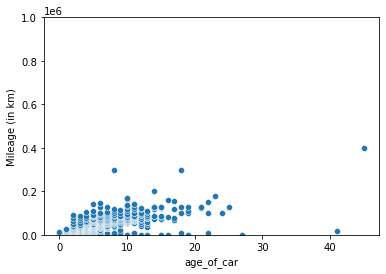

In [16]:
sns.scatterplot(y,x,data=final_df)
plt.ylim(0,1000000)

In [17]:
"""
Age and mileage should be directly correlated
Check normal distribution curve per brand
"""

'\nAge and mileage should be directly correlated\nCheck normal distribution curve per brand\n'

In [18]:
x_val_trim=x_val[x_val<700000]
y_val_trim=y_val[x_val<700000]

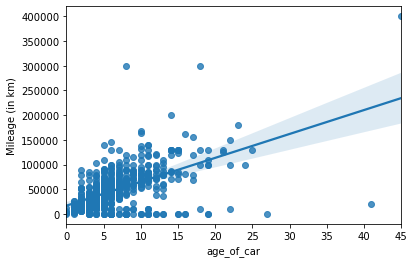

In [19]:
sns.regplot(y_val_trim,x_val_trim,data=final_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_val_trim,x_val_trim)

In [20]:
print(slope)
print(p_value)

4837.369510315531
2.568577692940014e-60


## Impute Mileage Using KNN

In [21]:
#gets the age of car with no null values in the mileage
X=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].notnull()])
#gets the age of car with null values in the mileage
X_null=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].isnull()])
#gets the mileage with no null values in the mileage
y=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()])
#gets the mileage with null values in the mileage
y_null=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].isnull()])

In [22]:
#might have to double check the neighbors
clf=KNeighborsRegressor(3,weights='distance')
trained_model=clf.fit(X,y)

In [23]:
#predicting imputed values and setting the index to match the X_null dataframe
imputed_val=pd.DataFrame(trained_model.predict(X_null),columns=['Mileage (in km)'])
X_null.reset_index(inplace=True)

In [24]:
#merge imputed values with your Yr of Manufacture pair
null_merged=pd.merge(X_null,imputed_val,how='outer',on=X_null.index)
#deleted useless key column that came from  the mileage dataframe
null_merged.drop('key_0',inplace=True,axis=1)
#index of Yr of Manufacture is set as the index
null_merged.set_index('index',inplace=True)

In [25]:
# merged them all together (Yr of Manufacture and Mileage) non null records
xy_merged=pd.concat([X,y],axis=1)
# merged the non nulls with the imputed or previous nulls
merged_df=pd.concat([null_merged,xy_merged],axis=0)
# rearranged indedx so it's prettier
merged_df=merged_df.sort_index()
merged_df.head()

,age_of_car,Mileage (in km)
1,27,1.0
2,19,1.0
3,19,1.0
4,8,1.0
5,7,1.0


In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 1 to 1102
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age_of_car       1014 non-null   int64  
 1   Mileage (in km)  1014 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 23.8 KB


In [27]:
# merge it with the whole df but original null mileage and age is still there
total_merge=pd.merge(final_df,merged_df,on=final_df.index)
# dropped the original null mileage and age. The new boys are in town!
total_merge.drop(['age_of_car_x','Mileage (in km)_x','key_0'],axis=1,inplace=True)
#renamed them
total_merge.columns=['id','price','brand','model','transmission','color','body_type','poster_type','fuel_type','location','retail','post_age_in_days','age_of_car','mileage_in_km']
total_merge.head()

,id,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
0,CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,27,1.0
1,CAR014654,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,19,1.0
2,CAR014656,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,19,1.0
3,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,8,1.0
4,CAR014768,330000,Ford,Fiesta,Automatic,Blue,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,7,1.0


## Time to change categorical values to numerical...

In [28]:
total_merge.info()
#object means it's a categorical value or text

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1014 non-null   object 
 1   price             1014 non-null   int64  
 2   brand             1014 non-null   object 
 3   model             1014 non-null   object 
 4   transmission      1014 non-null   object 
 5   color             1014 non-null   object 
 6   body_type         1014 non-null   object 
 7   poster_type       1014 non-null   object 
 8   fuel_type         1014 non-null   object 
 9   location          1014 non-null   object 
 10  retail            1014 non-null   int64  
 11  post_age_in_days  1014 non-null   int64  
 12  age_of_car        1014 non-null   int64  
 13  mileage_in_km     1014 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 118.8+ KB


In [29]:
#used label encoder to change cat to num
le = preprocessing.LabelEncoder()

In [30]:
# tm_col = ['brand','model','transmission','color','body_type','poster_type','fuel_type','location']
# le_classes = {}
# for col in tm_col:
#     total_merge[col]=le.fit_transform(total_merge[col])
#     le_classes.update({col: le.classes_})

In [31]:
# set it in the column itself to transform the dataframe into numbers and also making a dictionary so you can "unlock" the encoder with categorical values=
tm_col = ['brand','model','transmission','color','body_type','poster_type','fuel_type','location']
le_classes = {}
for col in tm_col:
    total_merge[col]=le.fit_transform(total_merge[col])
    le_classes.update({col: {le.classes_[n]:n for n in range(len(le.classes_))}})

In [32]:
le_classes

{'brand': {'BMW': 0,
  'Bmw': 1,
  'Chevrolet': 2,
  'Ford': 3,
  'Honda': 4,
  'Hummer': 5,
  'Hyundai': 6,
  'Isuzu': 7,
  'Jeep': 8,
  'Kia': 9,
  'Lexus': 10,
  'Mazda': 11,
  'Mercedes-Benz': 12,
  'Mitsubishi': 13,
  'Nissan': 14,
  'Subaru': 15,
  'Suzuki': 16,
  'Toyota': 17},
 'model': {'118D': 0,
  '2': 1,
  '3': 2,
  '320I': 3,
  '323': 4,
  '520D': 5,
  '86': 6,
  'ASX': 7,
  'Accent': 8,
  'Accord': 9,
  'Adventure': 10,
  'Almera': 11,
  'Alphard': 12,
  'Alterra': 13,
  'Altis': 14,
  'Alto': 15,
  'Apv': 16,
  'Avanza': 17,
  'B2200': 18,
  'BR-V': 19,
  'Brio': 20,
  'Brio Amaze': 21,
  'Brz': 22,
  'Bt-50': 23,
  'C55 AMG': 24,
  'CR-V': 25,
  'Camaro': 26,
  'Camry': 27,
  'Captiva': 28,
  'Celerio': 29,
  'City': 30,
  'Civic': 31,
  'Colorado': 32,
  'Corolla': 33,
  'Corolla Altis': 34,
  'CorollaAltis': 35,
  'Cr-V': 36,
  'Crosswind': 37,
  'Crosswind Sportivo': 38,
  'Cruze': 39,
  'Cx-5': 40,
  'D-Max': 41,
  'EcoSport': 42,
  'Ecosport': 43,
  'Elantra': 44,


In [33]:
#made the dataframe prettier by moving the id as index and deleting that pesky id title
total_merge.set_index('id',inplace=True)
total_merge.rename_axis(index=None,inplace=True)
total_merge.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR014569,250000,11,18,3,19,4,0,0,8,991800,62,27,1.0
CAR014654,250000,3,50,1,19,5,0,1,8,4258000,62,19,1.0
CAR014656,250000,3,50,1,19,5,0,1,8,4258000,62,19,1.0
CAR014683,419000,17,34,1,17,6,0,1,0,1131000,45,8,1.0
CAR014768,330000,3,53,1,2,6,0,1,8,875000,62,7,1.0


In [34]:
# I just reassigned just cause lol
final_df=total_merge.copy()

In [35]:
# adding dummy columns for categorical variables
final_df = pd.get_dummies(final_df,columns=['location','brand','model','color','transmission','body_type','poster_type','fuel_type'],drop_first=True)

In [36]:
# final_df=final_df.drop([], axis=1)

In [37]:
# df with dummy columns for categorical variables
final_df

,price,retail,post_age_in_days,age_of_car,mileage_in_km,location_1,location_2,location_3,location_4,location_5,...,body_type_1,body_type_2,body_type_3,body_type_4,body_type_5,body_type_6,body_type_7,poster_type_1,fuel_type_1,fuel_type_2
CAR014569,250000,991800,62,27,1.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
CAR014654,250000,4258000,62,19,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
CAR014656,250000,4258000,62,19,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
CAR014683,419000,1131000,45,8,1.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
CAR014768,330000,875000,62,7,1.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAR018809,720000,881000,189,1,11333.333333,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
CAR019467,390000,828000,62,11,49285.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
CAR019701,380000,876000,189,10,104617.666667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
CAR019713,780000,2225000,62,10,104617.666667,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#Splitting the dataset into the train and test data
X_train,X_test,y_train,y_test=train_test_split(final_df.drop(['price'], axis=1),final_df['price'],test_size=0.1, random_state=42)

# #Reset train index values
# X_train.reset_index(inplace=True)
# y_train=y_train.reset_index()

# # Reset train index values
# X_test.reset_index(inplace=True)
# y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(X_train.head())
print(X_test.head())

(912, 194) (102, 194) (912,) (102,)
            retail  post_age_in_days  age_of_car  mileage_in_km  location_1  \
CAR013885  3273000                73           0    2953.333333           1   
CAR003958  1668000                67          11   85356.000000           1   
CAR002319  1581000                55           1    9000.000000           0   
CAR013165  1605000                41           1    5000.000000           1   
CAR013888  3273000                73           0    2953.333333           1   

           location_2  location_3  location_4  location_5  location_6  ...  \
CAR013885           0           0           0           0           0  ...   
CAR003958           0           0           0           0           0  ...   
CAR002319           0           0           0           0           1  ...   
CAR013165           0           0           0           0           0  ...   
CAR013888           0           0           0           0           0  ...   

           body_type

In [39]:
from sklearn import linear_model
#Training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [40]:
#Fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

In [41]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the Model :',lr)

Accuracy of the Model : 0.8586275308050257


In [42]:
import statsmodels.api as sm
#Regression Summary
X_train_2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_2)
est = model.fit()

print(est.summary(yname='price'))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     27.26
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          9.07e-231
Time:                        10:52:22   Log-Likelihood:                -12658.
No. Observations:                 912   AIC:                         2.565e+04
Df Residuals:                     745   BIC:                         2.645e+04
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.302e+06   5.54e+05  